
<img src="https://static.wixstatic.com/media/8cb7ea_82957ac107aa4d07a51d503520820f21~mv2.png/v1/fill/w_500,h_438,al_c/8cb7ea_82957ac107aa4d07a51d503520820f21~mv2.png" alt="Tech4Animals Logo" width="250">

[Tech4Animals](https://www.tech4animals.org/)
---



# Animal Facial Landmarks API Documentation



## Overview







This guide provides instructions on how to send an image to our animal facial landmark detector. The service will return the landmarks facial landmarks of animals. The image should be in Base64 format, and the request is made using a JSON payload. Currently the animal facial landmark detector supports cats and dogs (dogs model is still being enhanced and will be updated very soon).

This notebook will explain the needed steps and demonstrate them on an example image.

You can read more about the project in the following paper: https://link.springer.com/article/10.1007/s11263-024-02006-w



## Prerequisites

- `base64`
- `json`
- `requests` OR `curl`

Ensure curl is installed on your system. curl is typically pre-installed on macOS and Linux. On Windows, you might need to install it or use a tool like Git Bash which includes curl.

In [1]:
import base64
import requests
import json

## Steps

### 1. Convert the Image to Base64

The `convert_image_to_base64` function reads the image file in binary mode and encodes its content to a Base64 string.

In [2]:
def convert_image_to_base64(image_path):
  with open(image_path, "rb") as image_file:
    base64_string = base64.b64encode(image_file.read()).decode('utf-8')
  return base64_string

### 2. Create the JSON Payload

The `create_json_payload` function constructs a JSON object with the name field set to the image's filename and the image field set to the Base64-encoded string prefixed with data:image/jpeg;base64,.

In [3]:
def create_json_payload(image_path, image_base64_string):
  payload = {
    "name": image_path.split("/")[-1],  # Extract the filename from the path
    "image": f"data:image/jpeg;base64,{image_base64_string}"
  }
  return json.dumps(payload)

### 3. Send the HTTP POST Request:

The `send_image_for_processing` function sends the JSON payload to the specified URL using an HTTP POST request. It includes appropriate headers and handles the response.

In [4]:
def send_image_for_processing(image_path, url):
  image_base64_string = convert_image_to_base64(image_path)
  request = create_json_payload(image_path, image_base64_string)

  headers = {'Content-Type': 'application/json'}

  response = requests.post(url, data=request, headers=headers)

  if response.status_code == 200:
    print("Image processed successfully!")
    print("Response:", response.json())
    return response.json()
  else:
    print("Failed to process image")

Alternatively, you could can send the request using `curl` from your Command Link / Terminal given the request is ready and saved as `request.json`, using the following command:


```
curl -X POST http://34.165.25.79:6000/landmarks \
     -H "Content-Type: application/json" \
     -d @request.json

```



### Usage Example

Get cat image using a link.

In [5]:
#@title get cat image

cat_url = "https://i.natgeofe.com/n/548467d8-c5f1-4551-9f58-6817a8d2c45e/NationalGeographic_2572187_square.jpg" # @param {type:"string"}

# Send a GET request to the URL
response = requests.get(cat_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
  # Open a file in binary write mode and save the image content
  with open("image.jpg", "wb") as f:
    f.write(response.content)
  print("Cat image downloaded successfully!")
else:
  print("Failed to download the cat image.")

Cat image downloaded successfully!


# Change Path

In [26]:
url = "http://34.165.60.2:6000/landmarks"
image_path = r"C:\Users\Wanlipa\Desktop\Deep Learing\project\angry\23.png"


# Send the image for processing
result = send_image_for_processing(image_path, url)



Image processed successfully!
Response: [{'cat': {'bbox': {'pul': {'x': 1, 'y': 39}, 'pbr': {'x': 352, 'y': 345}, 'label': 'cat', 'score': 0.9285095930099487}, 'landmarks': [{'x': 177, 'y': 311, 'label': 'part0', 'score': '1.00'}, {'x': 229, 'y': 246, 'label': 'part1', 'score': '1.00'}, {'x': 177, 'y': 320, 'label': 'part2', 'score': '1.00'}, {'x': 128, 'y': 246, 'label': 'part3', 'score': '1.00'}, {'x': 109, 'y': 230, 'label': 'part4', 'score': '1.00'}, {'x': 149, 'y': 246, 'label': 'part5', 'score': '1.00'}, {'x': 129, 'y': 227, 'label': 'part6', 'score': '1.00'}, {'x': 128, 'y': 257, 'label': 'part7', 'score': '1.00'}, {'x': 248, 'y': 229, 'label': 'part8', 'score': '1.00'}, {'x': 208, 'y': 249, 'label': 'part9', 'score': '1.00'}, {'x': 229, 'y': 224, 'label': 'part10', 'score': '1.00'}, {'x': 228, 'y': 256, 'label': 'part11', 'score': '1.00'}, {'x': 168, 'y': 279, 'label': 'part12', 'score': '1.00'}, {'x': 185, 'y': 278, 'label': 'part13', 'score': '1.00'}, {'x': 160, 'y': 284, 'la

#### Print the image with the landmarks

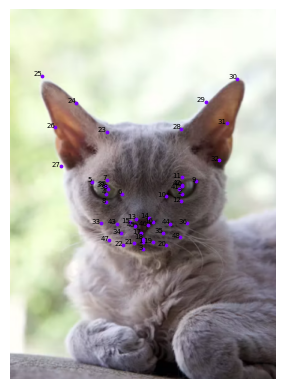

In [27]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import matplotlib.cm as cm
import numpy as np

# Define the image path and result (example placeholders)

# Open the image
image = Image.open(image_path)

# Create a figure and axis
fig, ax = plt.subplots()

# Display the image
ax.imshow(image)

# Define the number of distinct animals
num_animals = len(result)
cmap = plt.colormaps['rainbow']

# Iterate over the result to plot landmarks with different colors
for i, animal_data in enumerate(result):
    for animal, details in animal_data.items():
        color = cmap(i / num_animals)  # Get a color from the colormap
        landmarks = details['landmarks']
        
        # Extract x and y coordinates
        x_coords = [landmark['x'] for landmark in landmarks]
        y_coords = [landmark['y'] for landmark in landmarks]
        
        # Plot each landmark and annotate with index
        for j, (x, y) in enumerate(zip(x_coords, y_coords)):
            ax.scatter(x, y, color=color, s=3)
            ax.text(x, y, str(j+1), fontsize=5, ha='right')



# Turn off the axis
plt.axis('off')

# Show the plot
plt.show()


# Plot Image

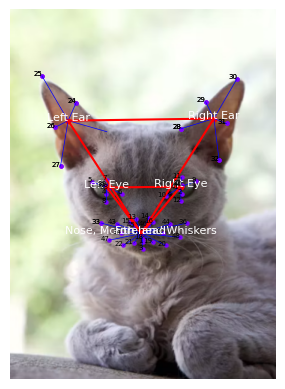

In [34]:
# Open the image
image = Image.open(image_path)

# Create a figure and axis
fig, ax = plt.subplots()

# Display the image
ax.imshow(image)

# Define the number of distinct animals
num_animals = len(result)
cmap = plt.colormaps['rainbow']

# Function to calculate the mean point from landmarks
def mean_point(landmarks, indices):
    x_coords = [landmarks[j]['x'] for j in indices if j < len(landmarks)]
    y_coords = [landmarks[j]['y'] for j in indices if j < len(landmarks)]
    return sum(x_coords) / len(x_coords), sum(y_coords) / len(y_coords)

# Variables to store the mean points of the ears
mean_point_left_ear = None
mean_point_right_ear = None
mean_point_right_eye = None
mean_point_right_eye = None
mean_point_nose=None

# Iterate over the result to plot landmarks with different colors
for i, animal_data in enumerate(result):
    for animal, details in animal_data.items():
        color = cmap(i / num_animals)  # Get a color from the colormap
        landmarks = details['landmarks']
        
        # Plot each landmark
        for region, indices in regions.items():
            x_coords = [landmarks[j]['x'] for j in indices if j < len(landmarks)]  # Indices are 0-based
            y_coords = [landmarks[j]['y'] for j in indices if j < len(landmarks)]
            
            # Scatter plot for the landmarks
            ax.scatter(x_coords, y_coords, color=color, s=5, label=region)
            
            if region == 'Left Eye':
                central_x, central_y = mean_point(landmarks, [36, 37])
                mean_point_left_eye = (central_x, central_y)
                for index in [3, 4, 5, 6, 7, 36, 37, 38]:
                    x, y = landmarks[index]['x'], landmarks[index]['y']
                    ax.plot([central_x, x], [central_y, y], color='blue', linewidth=0.5)

            elif region == 'Right Eye':
                central_x, central_y = mean_point(landmarks, [40, 41])
                mean_point_right_eye = (central_x, central_y)
                for index in [1, 8, 9, 10, 11, 39, 40, 41]:
                    x, y = landmarks[index]['x'], landmarks[index]['y']
                    ax.plot([central_x, x], [central_y, y], color='blue', linewidth=0.5)

            elif region == 'Nose, Mouth, and Whiskers':
                central_x, central_y = landmarks[16]['x'], landmarks[16]['y']
                mean_point_nose = (central_x, central_y)
                for index in [0, 2, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 32, 33, 34, 35, 42, 43, 44, 45, 46, 47]:
                    x, y = landmarks[index]['x'], landmarks[index]['y']
                    ax.plot([central_x, x], [central_y, y], color='blue', linewidth=0.5)

            elif region == 'Left Ear':
                central_x, central_y = mean_point(landmarks, [22, 23, 24, 25, 26])
                mean_point_left_ear = (central_x, central_y)
                for index in [22, 23, 24, 25, 26]:
                    x, y = landmarks[index]['x'], landmarks[index]['y']
                    ax.plot([central_x, x], [central_y, y], color='blue', linewidth=0.5)

            elif region == 'Right Ear':
                central_x, central_y = mean_point(landmarks, [27, 28, 29, 30, 31])
                mean_point_right_ear = (central_x, central_y)
                for index in [27, 28, 29, 30, 31]:
                    x, y = landmarks[index]['x'], landmarks[index]['y']
                    ax.plot([central_x, x], [central_y, y], color='blue', linewidth=0.5)

            # Scatter plot for the central point
            ax.scatter(central_x, central_y, color='red', s=10)
            ax.text(central_x, central_y, region, fontsize=8, ha='center', color='white')
            
            for j, (x, y) in enumerate(zip(x_coords, y_coords)):
                ax.text(x, y, str(indices[j]+1), fontsize=5, ha='right')

# Draw line between the mean points of Left Ear and Right Ear

if mean_point_left_ear and mean_point_right_ear:
    ax.plot([mean_point_left_ear[0], mean_point_right_ear[0]],[mean_point_left_ear[1], mean_point_right_ear[1]],
            [mean_point_left_eye[0], mean_point_right_eye[0]],[mean_point_left_eye[1], mean_point_right_eye[1]],
            [mean_point_left_eye[0], mean_point_nose[0]],[mean_point_left_eye[1], mean_point_nose[1]],
            [mean_point_right_eye[0], mean_point_nose[0]],[mean_point_right_eye[1], mean_point_nose[1]],
            [mean_point_left_ear[0], mean_point_nose[0]],[mean_point_left_ear[1], mean_point_nose[1]],
            [mean_point_right_ear[0], mean_point_nose[0]],[mean_point_right_ear[1], mean_point_nose[1]],


            color='red', linewidth=1.5)

# Turn off the axis
plt.axis('off')

# Show the plot
plt.show()
